<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Deep_Computer_Vision_With_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Load dan Preprocessing Dataset

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Tambah dimensi channel (1 untuk grayscale) dan normalisasi
X_train_full = X_train_full[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

# Split validation dan training
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Definisi CNN Model

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile dan Training

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 60ms/step - accuracy: 0.7427 - loss: 0.7136 - val_accuracy: 0.8930 - val_loss: 0.2957
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 101s 59ms/step - accuracy: 0.8824 - loss: 0.3330 - val_accuracy: 0.9030 - val_loss: 0.2662
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 140s 58ms/step - accuracy: 0.9007 - loss: 0.2758 - val_accuracy: 0.9084 - val_loss: 0.2474
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 100s 58ms/step - accuracy: 0.9121 - loss: 0.2366 - val_accuracy: 0.9202 - val_loss: 0.2136
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.9218 - loss: 0.2096 - val_accuracy: 0.9208 - val_loss: 0.2155


Evaluasi Model

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9150 - loss: 0.2470
Test accuracy: 0.9162999987602234


Visualisasi Filter Layer Pertama

Shape of filters: (3, 3, 1, 32)


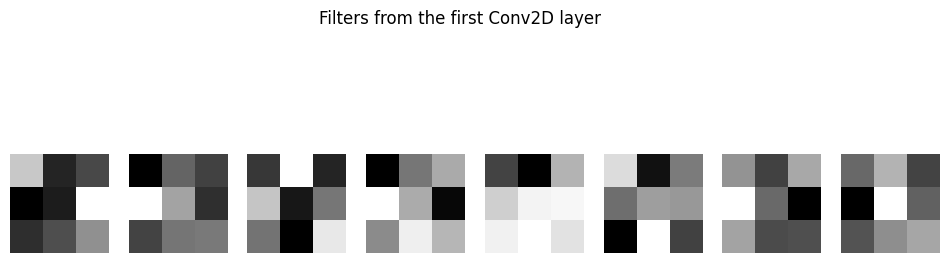

In [6]:
first_layer = model.layers[0]
weights, biases = first_layer.get_weights()

print("Shape of filters:", weights.shape)  # (3, 3, 1, 32)

# Tampilkan beberapa filter
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(8):
    f = weights[:, :, 0, i]
    plt.subplot(1, 8, i+1)
    plt.imshow(f, cmap="gray")
    plt.axis("off")
plt.suptitle("Filters from the first Conv2D layer")
plt.show()